<a href="https://colab.research.google.com/github/bhowad-akash/Machine-Learning/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoders using Fashion MNIST Dataset

In [26]:
#import necessary libraries
import keras

In [27]:
#Loading the image data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
'''The images in the dataset have the pixel values ranging from 0-255.
Thus, mapping the intensities from [0-255] to 0.0 to 1.0'''

x_train = x_train / 255.0
x_test = x_test / 255.0

encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

The encoder transforms the 28x28 input image into a 30-dimensional latent representation.
The decoder reconstructs the 30-dimensional latent representation back to a 28x28 image.

In [29]:
#Combining the Encoder and Decoder
model = keras.models.Sequential([encoder, decoder])

In [30]:
'''binary_crossentropy is the common loss function for auto encoders,
especially when output values are in the range [0,1].

The learning rate is a hyperparameter that determines the step size at each iteration
while moving towards a minimum of the loss function'''

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [31]:
'''During training, both the input and output data are x_train. This is because, in an autoencoder, the model learns to reconstruct the input data.
Therefore, the target output is the same as the input.'''

model_history = model.fit(x_train, x_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3399 - val_loss: 0.3164
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3075 - val_loss: 0.3059
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3017 - val_loss: 0.3027
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2985 - val_loss: 0.2989
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2961 - val_loss: 0.3046
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2943 - val_loss: 0.2969
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2927 - val_loss: 0.2948
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2914 - val_loss: 0.2930
Epoch 9/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2904 - val_loss: 0.2921
Epoch 10/10
1688/1688 [==============================] - 10s 6ms/step - los

In [32]:
#Visualise results of Autoencoder model by comparing original test images with the reconstructed images
import matplotlib.pyplot as plt

#Defining a function to plot images
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

1/1 [==============================] - 0s 93ms/step


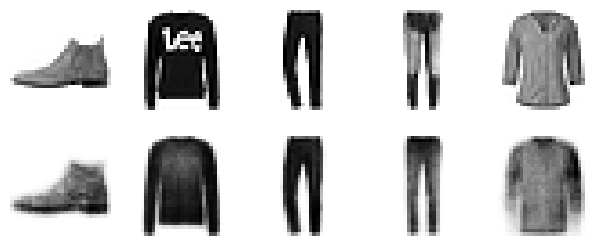

In [33]:
#Visualising original and Reconstructed images

n_images = 5              #No. of images to visualise
reconstructions = model.predict(x_test[:n_images])  #Using autoencoder to predict (reconstruct) first 5 images from the test set
fig = plt.figure(figsize=(n_images*1.5, 3))    #Setting the figure size. Width=No. of images, Height = 3
for idx in range(n_images):
  plt.subplot(2, n_images, 1+idx)    #Creates subplot for original image, 2 rows and n_images = 5 columns. The position of the subplot is determined by 1+idx for the first row.
  plot_image(x_test[idx])
  plt.subplot(2, n_images, 1+n_images+idx)    #Creates subplot for reconstructed image, 2 rows and n_images = 5 columns
  plot_image(reconstructions[idx])